In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Introduction to Graph Theory

Graph theory is the study of graphs, where graphs are mathematical structures that model pairwise relations between objects. The way that we related these objects are with vertices and edges, where our objects are our vertices and the relations are the edges. A key example is a family tree. Our vertices would be each person in the family, and the edges would be the relation. So if we have the following family tree: 

{'USA': ['Canada', 'Mexico'], 'Mexico': ['USA', 'Guatemala', 'Belize'], 'Canada': ['USA']}
['USA', 'Canada', 'Mexico', 'Guatemala', 'Belize']


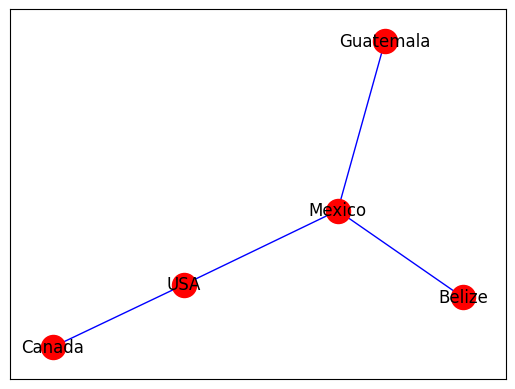

In [4]:
neighbors = {'USA': ['Canada', 'Mexico'],
             'Mexico': ['USA', 'Guatemala', 'Belize'],
             'Canada': ['USA']
            }

print(neighbors)

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for neighbor in neighbors:
    G.add_node(neighbor)
    for n in neighbors[neighbor]:
        G.add_edge(neighbor,n)

print(G.nodes)

nx.draw_networkx(G, node_color='r', edge_color = 'b', with_labels = True)

plt.show()

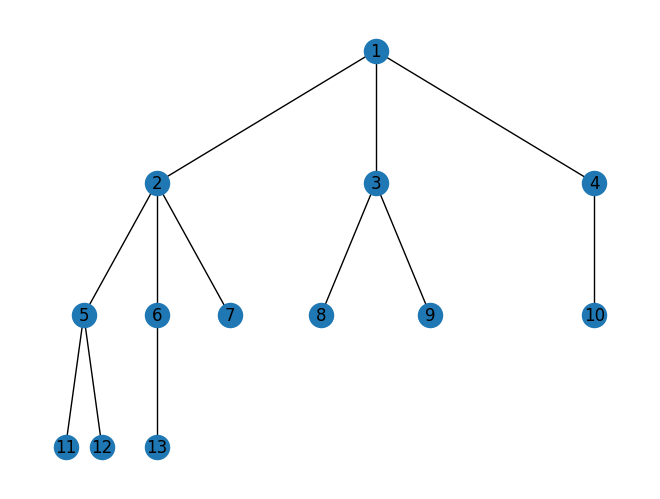

{'USA': ['Canada', 'Mexico'], 'Mexico': ['USA', 'Guatemala', 'Belize'], 'Canada': ['USA']}
['USA', 'Canada', 'Mexico', 'Guatemala', 'Belize']


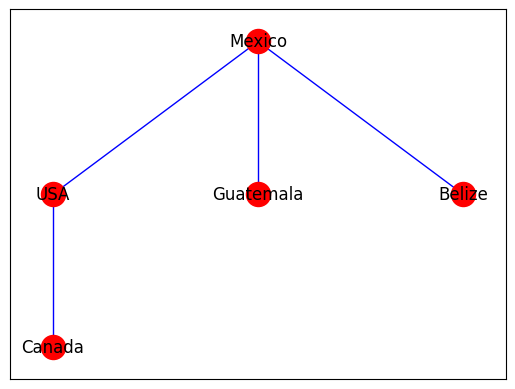

In [7]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


G=nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  (5,11), (5,12), (6,13)])
pos = hierarchy_pos(G,1)    
nx.draw(G, pos=pos, with_labels=True)
plt.show()


neighbors = {'USA': ['Canada', 'Mexico'],
             'Mexico': ['USA', 'Guatemala', 'Belize'],
             'Canada': ['USA']
            }

print(neighbors)

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for neighbor in neighbors:
    G.add_node(neighbor)
    for n in neighbors[neighbor]:
        G.add_edge(neighbor,n)

print(G.nodes)

pos = hierarchy_pos(G,'Mexico') 
nx.draw_networkx(G, node_color='r', edge_color = 'b', pos = pos, with_labels = True)


plt.show()